<a href="https://colab.research.google.com/github/ranjith-getgit/SQL-with-Python/blob/main/SQL_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL with Python📘
---
SQL is the most commonly used query language to communicate with relational databases. Did you know you can use SQL with Python 🐍 to write queries?

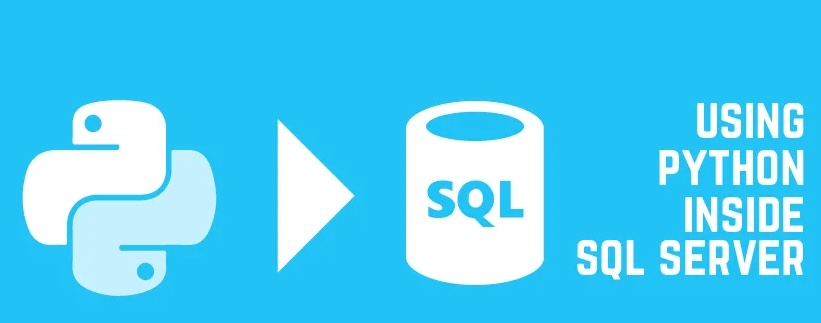

This notebook focuses on generating queries using the SQLite3 package/library that leverages the Python's dataframe structure to write SQLite queries to store, process, analyze and retrieve data. Standard python-syntax is combined with the SQLite query structure to generate results.

I have used the food production data (csv files) for query illustration. The files can be obtained from Github 🐙

Before we get started, let's introduce the important SQL packages that are commonly used in Python.


##SQL Packages 📦

The following two SQL packages are prominently used in the Python environment.

###SQLAlchemy

**SQLAlchemy** is an open-source Python library that provides an SQL toolkit and an Object Relational Mapper for database interactions. It allows developers to work with databases using Python objects, enabling efficient and flexible database access.

SQLAlchemy is not a database engine itself, but a library that provides tools to interact with various databases (SQLite, PostgreSQL, MySQL, Oracle and others)) using high-level Python code.

In [ ]:
!pip install sqlalchemy==2.0.35
!pip install ipython-sql

**Load SQL Extension**

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**Load files from Google Drive** - the CSV files were uploaded to my drive for better accessibility

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###SQLite3

**SQLite3** is a database engine and library that implements a self-contained, serverless, zero-configuration SQL database engine.

It is used to interact directly with an SQLite database, which stores data in a lightweight file format. SQLite3 provides basic SQL commands for creating, querying, and managing databases.

In relation to its abstraction level, SQLite3 is at lower level and directly interacts with the database in comparison to SQLAlchemy which operates at higher level and interacts with the database using Python methods without writing raw SQL *(although you can still write raw SQL if needed)*.

SQLite3 is ideal for small applications, embedded systems, testing, or when you only need a simple, single-file database solution. SQLAlchemy is better for larger applications, especially when you need to support multiple databases or manage complex schema relationships.

##CSV files and Creation of Databases 🗄

The procured CSV files need to be moved to SQLite database (DB) so as to run it with python. SQLite cannot read csv files and hence requires a conversion. Follow the following steps for conversion:


*   Step 1: Import the Sqlite3 and Pandas package
*   Step 2: Create a dataframe and read the csv file using *'pd.read'*
*   Step 3: Create a DB (eg.sqldb) by connecting to Sqlite3 (the connection is opened using the *'sqlite3.connect'* command)

Henceforward, the DB will be utilised to generate queries.





In [ ]:
import sqlite3
import pandas as pd

In [ ]:
sqlpath = '////content/drive/MyDrive/SQLFiles/cheese_production.csv'
sqldf = pd.read_csv('////content/drive/MyDrive/SQLFiles/cheese_production.csv')
sqldb = sqlite3.connect('////content/drive/MyDrive/SQLFiles/cheese_production.db')

sqlpath = '////content/drive/MyDrive/SQLFiles/coffee_production.csv'
sqldf2 = pd.read_csv('////content/drive/MyDrive/SQLFiles/coffee_production.csv')
sqldb2 = sqlite3.connect('////content/drive/MyDrive/SQLFiles/coffee_production.db')

sqlpath = '////content/drive/MyDrive/SQLFiles/egg_production.csv'
sqldf3 = pd.read_csv('////content/drive/MyDrive/SQLFiles/egg_production.csv')
sqldb3 = sqlite3.connect('////content/drive/MyDrive/SQLFiles/egg_production.db')

sqlpath = '////content/drive/MyDrive/SQLFiles/milk_production.csv'
sqldf4 = pd.read_csv('////content/drive/MyDrive/SQLFiles/milk_production.csv')
sqldb4 = sqlite3.connect('////content/drive/MyDrive/SQLFiles/milk_production.db')

sqlpath = '////content/drive/MyDrive/SQLFiles/state_lookup.csv'
sqldf5 = pd.read_csv('////content/drive/MyDrive/SQLFiles/state_lookup.csv')
sqldb5 = sqlite3.connect('////content/drive/MyDrive/SQLFiles/state_lookup.db')

sqlpath = '////content/drive/MyDrive/SQLFiles/yogurt_production.csv'
sqldf6 = pd.read_csv('////content/drive/MyDrive/SQLFiles/yogurt_production.csv')
sqldb6 = sqlite3.connect('////content/drive/MyDrive/SQLFiles/yogurt_production.db')

sqlpath = '////content/drive/MyDrive/SQLFiles/honey_production.csv'
sqldf7 = pd.read_csv('////content/drive/MyDrive/SQLFiles/honey_production.csv')
sqldb7 = sqlite3.connect('////content/drive/MyDrive/SQLFiles/honey_production.db')

Now, the data requires a transfer from the CSV files to the new DBs by creating tables. It is also to be made sure that the data follows the right data type. Each column will be appropriately mapped with the correct data type.

The tables are named as per its corresponding csv files.

In [ ]:
table_name1 = 'cheese_production'
cp1 = {'Year': 'INTEGER', 'Period': 'TEXT', 'Geo_Level': 'TEXT', 'State_ANSI': 'INTEGER', 'Commodity_ID': 'INTEGER', 'Domain': 'TEXT', 'Value': 'INTEGER'}
sqldf.to_sql(table_name1, sqldb, if_exists='replace', index=False, dtype=cp1)

table_name2 = 'coffee_production'
cp2 = {'Year': 'INTEGER', 'Period': 'TEXT', 'Geo_Level': 'TEXT', 'State_ANSI': 'INTEGER', 'Commodity_ID': 'INTEGER', 'Value': 'INTEGER'}
sqldf2.to_sql(table_name2, sqldb2, if_exists='replace', index=False, dtype=cp2)

table_name3 = 'egg_production'
ep = {'Year': 'INTEGER', 'Period': 'TEXT', 'Geo_Level': 'TEXT', 'State_ANSI': 'INTEGER', 'Commodity_ID': 'INTEGER', 'Value': 'INTEGER'}
sqldf3.to_sql(table_name3, sqldb3, if_exists='replace', index=False, dtype=ep)

table_name4 = 'milk_production'
mp = {'Year': 'INTEGER', 'Period': 'TEXT', 'Geo_Level': 'TEXT', 'State_ANSI': 'INTEGER', 'Commodity_ID': 'INTEGER', 'Domain': 'INTEGER', 'Value': 'INTEGER'}
sqldf4.to_sql(table_name4, sqldb4, if_exists='replace', index=False, dtype=mp)

table_name5 = 'state_lookup'
sl = {'State_ANSI': 'INTEGER', 'State': 'TEXT'}
sqldf5.to_sql(table_name5, sqldb5, if_exists='replace', index=False, dtype=sl)

table_name6 = 'yogurt_production'
yp = {'Year': 'INTEGER', 'Period': 'TEXT', 'Geo_Level': 'TEXT', 'State_ANSI': 'INTEGER', 'Commodity_ID': 'INTEGER', 'Domain': 'TEXT', 'Value': 'INTEGER'}
sqldf6.to_sql(table_name6, sqldb6, if_exists='replace', index=False, dtype=yp)

table_name7 = 'honey_production'
hp = {'Year': 'INTEGER', 'Geo_Level': 'TEXT', 'State_ANSI': 'INTEGER', 'Commodity_ID': 'INTEGER', 'Value': 'INTEGER'}
sqldf7.to_sql(table_name7, sqldb7, if_exists='replace', index=False, dtype=hp)

1559

All set! Now, SQL queries can be normally generated. Also, make sure to write the query in strings with quotation marks *(" ")* or *(' ')*

To generate results, make sure to print it.

##SQL Queries (Illustrations)❓
A query msut follow three main steps:

*   Every query must be produced in a dataframe with its corresponding database from where the data requires to be extracted.
*   Print results
*   Close the database connection once results are generated






Query 1: Generate the whole table (every column) from the cheese production dataset.

In [ ]:
query1 = pd.read_sql('SELECT * FROM cheese_production', sqldb)
print(query1)

      Year Period Geo_Level  State_ANSI  Commodity_ID Domain        Value
0     2023    APR     STATE         6.0             6  TOTAL  208,807,000
1     2023    APR     STATE        16.0             6  TOTAL   86,452,000
2     2023    APR     STATE        17.0             6  TOTAL    5,068,000
3     2023    APR     STATE        19.0             6  TOTAL   31,512,000
4     2023    APR     STATE        27.0             6  TOTAL   69,728,000
...    ...    ...       ...         ...           ...    ...          ...
7483  1970   YEAR     STATE        48.0             6  TOTAL   11,124,000
7484  1970   YEAR     STATE        49.0             6  TOTAL   32,966,000
7485  1970   YEAR     STATE        50.0             6  TOTAL   32,730,000
7486  1970   YEAR     STATE        53.0             6  TOTAL   20,126,000
7487  1970   YEAR     STATE        55.0             6  TOTAL  947,591,000

[7488 rows x 7 columns]


Query 2: Generate production values for the year 2023 from the cheese production dataset.

In [ ]:
query2 = pd.read_sql('SELECT Year, Value FROM cheese_production WHERE Year = 2023', sqldb)
print(query2)

    Year        Value
0   2023  208,807,000
1   2023   86,452,000
2   2023    5,068,000
3   2023   31,512,000
4   2023   69,728,000
5   2023    4,889,000
6   2023   79,038,000
7   2023   66,256,000
8   2023   20,510,000
9   2023  215,206,000
10  2023   39,420,000
11  2023   43,253,000
12  2023   11,279,000
13  2023  289,699,000
14  2023  201,881,000
15  2023   72,363,000
16  2023    4,865,000
17  2023   31,219,000
18  2023   65,560,000
19  2023    4,390,000
20  2023   74,094,000
21  2023   66,098,000
22  2023   19,828,000
23  2023  196,281,000
24  2023   38,358,000
25  2023   42,132,000
26  2023   10,819,000
27  2023  272,374,000
28  2023  203,976,000
29  2023   89,502,000
30  2023    5,505,000
31  2023   32,903,000
32  2023   70,870,000
33  2023    5,717,000
34  2023   95,543,000
35  2023   71,829,000
36  2023   22,913,000
37  2023  259,418,000
38  2023   38,038,000
39  2023   12,741,000
40  2023  296,382,000
41  2023  219,163,000
42  2023   91,789,000
43  2023    5,165,000
44  2023  

Query 3: Generate all production values for the year 2023 which is greater than 50,000 from the cheese production dataset.

In [ ]:
query3 = pd.read_sql('SELECT Year, Period, Value FROM cheese_production WHERE Year = 2023 AND Value > 50000', sqldb)
print(query3)

    Year Period        Value
0   2023    APR  208,807,000
1   2023    APR   86,452,000
2   2023    APR    5,068,000
3   2023    APR   31,512,000
4   2023    APR   69,728,000
5   2023    APR    4,889,000
6   2023    APR   79,038,000
7   2023    APR   66,256,000
8   2023    APR   20,510,000
9   2023    APR  215,206,000
10  2023    APR   39,420,000
11  2023    APR   43,253,000
12  2023    APR   11,279,000
13  2023    APR  289,699,000
14  2023    FEB  201,881,000
15  2023    FEB   72,363,000
16  2023    FEB    4,865,000
17  2023    FEB   31,219,000
18  2023    FEB   65,560,000
19  2023    FEB    4,390,000
20  2023    FEB   74,094,000
21  2023    FEB   66,098,000
22  2023    FEB   19,828,000
23  2023    FEB  196,281,000
24  2023    FEB   38,358,000
25  2023    FEB   42,132,000
26  2023    FEB   10,819,000
27  2023    FEB  272,374,000
28  2023    JAN  203,976,000
29  2023    JAN   89,502,000
30  2023    JAN    5,505,000
31  2023    JAN   32,903,000
32  2023    JAN   70,870,000
33  2023    JA

Query 4: Generate the whole table (every column) from the coffee production dataset.

In [ ]:
query4 = pd.read_sql('SELECT * FROM coffee_production ORDER BY Year ASC', sqldb2)
print(query4)

    Year Period Geo_Level  State_ANSI  Commodity_ID      Value
0   1946   YEAR     STATE          15             1  8,625,000
1   1947   YEAR     STATE          15             1  8,738,000
2   1948   YEAR     STATE          15             1  7,375,000
3   1949   YEAR     STATE          15             1  5,375,000
4   1950   YEAR     STATE          15             1  9,375,000
..   ...    ...       ...         ...           ...        ...
66  2012   YEAR     STATE          15             1  7,000,000
67  2013   YEAR     STATE          15             1  8,400,000
68  2014   YEAR     STATE          15             1  7,500,000
69  2015   YEAR     STATE          15             1  6,600,000
70  2016   YEAR     STATE          15             1  5,400,000

[71 rows x 6 columns]


**Introduction to JOINS**

Query5: Generate cheese and coffee production dataset for the year 2015.

(INNER JOIN is used to query the data)

In [ ]:
query5a = pd.read_sql('SELECT * FROM cheese_production WHERE Year = 2015', sqldb)
query5b = pd.read_sql('SELECT * FROM coffee_production WHERE Year = 2015', sqldb2)
query5 = pd.merge(query5a, query5b, on='Year', how='inner')
print(query5)

     Year Period_x Geo_Level_x  State_ANSI_x  Commodity_ID_x Domain  \
0    2015      APR       STATE           6.0               6  TOTAL   
1    2015      APR       STATE          16.0               6  TOTAL   
2    2015      APR       STATE          17.0               6  TOTAL   
3    2015      APR       STATE          19.0               6  TOTAL   
4    2015      APR       STATE          27.0               6  TOTAL   
..    ...      ...         ...           ...             ...    ...   
178  2015     YEAR       STATE           NaN               6  TOTAL   
179  2015     YEAR       STATE          42.0               6  TOTAL   
180  2015     YEAR       STATE          46.0               6  TOTAL   
181  2015     YEAR       STATE          50.0               6  TOTAL   
182  2015     YEAR       STATE          55.0               6  TOTAL   

           Value_x Period_y Geo_Level_y  State_ANSI_y  Commodity_ID_y  \
0      204,541,000     YEAR       STATE            15               1   
1

Query 6: Generate the whole table (every column) from the milk production dataset.

In [ ]:
query6 = pd.read_sql('SELECT * FROM milk_production', sqldb4)
print(query6)

       Year Period Geo_Level  State_ANSI  Commodity_ID Domain           Value
0      2023    APR     STATE         4.0             5  TOTAL     428,000,000
1      2023    APR     STATE         6.0             5  TOTAL   3,543,000,000
2      2023    APR     STATE         8.0             5  TOTAL     444,000,000
3      2023    APR     STATE        12.0             5  TOTAL     166,000,000
4      2023    APR     STATE        13.0             5  TOTAL     180,000,000
...     ...    ...       ...         ...           ...    ...             ...
37633  1924   YEAR     STATE        51.0             5  TOTAL   1,287,000,000
37634  1924   YEAR     STATE        53.0             5  TOTAL   1,540,000,000
37635  1924   YEAR     STATE        54.0             5  TOTAL     709,000,000
37636  1924   YEAR     STATE        55.0             5  TOTAL  10,127,000,000
37637  1924   YEAR     STATE        56.0             5  TOTAL     223,000,000

[37638 rows x 7 columns]


Query 6a: Generate the total value (sum) for every year from the milk production dataset.

In [ ]:
query6a = pd.read_sql('''SELECT Year, SUM(CAST(REPLACE(TRIM(NULLIF(Value, '')), ',', '') AS INTEGER)) AS TotalValue FROM milk_production GROUP BY Year''', sqldb4)
print(query6a)

    Year    TotalValue
0   1924   89240000000
1   1925   90699000000
2   1926   93325000000
3   1927   95172000000
4   1928   95843000000
..   ...           ...
95  2019  426558800000
96  2020  436222000000
97  2021  442457900000
98  2022  443045700000
99  2023   91812000000

[100 rows x 2 columns]


Query 7: Generate the total value (sum) for the year 2015 from the coffee production dataset.

In [ ]:
query7 = pd.read_sql('''SELECT Year, SUM(CAST(REPLACE(TRIM(NULLIF(Value, '')), ',', '') AS INTEGER)) AS TotalValue FROM coffee_production GROUP BY Year = 2015''', sqldb2)
print(query7)

   Year  TotalValue
0  2016   454607000
1  2015     6600000


Query 8: Generate the average value (avg) for the year 2022 from the honey production dataset.

In [ ]:
query8 = pd.read_sql('''SELECT Year, AVG(CAST(REPLACE(TRIM(NULLIF(Value, '')), ',', '') AS INTEGER)) AS AvgValue FROM honey_production GROUP BY Year = 2022''', sqldb7)
print(query8)

   Year      AvgValue
0  2021  4.172943e+06
1  2022  3.133275e+06


Query 9: Identify the state code for 'Iowa' from the state lookup dataset.

In [ ]:
query9 = pd.read_sql("SELECT * FROM state_lookup WHERE State = 'IOWA'",sqldb5)
print(query9)

  State  State_ANSI
0  IOWA          19


Query 10: Identify the production value for yogurt for the year 2022 using the yogurt production dataset.

In [ ]:
query10 = pd.read_sql('SELECT Year, Value FROM yogurt_production GROUP BY Year HAVING Year = 2022',sqldb6)
print(query10)

   Year        Value
0  2022  377,839,000


Query 11: Identify the honey and milk production value for the year 2022 and for the state code '35'

(INNER JOIN is used to query the data)

In [ ]:
query11a = pd.read_sql('SELECT Year, State_ANSI, Value FROM honey_production WHERE Year = 2022 AND State_ANSI = 35',sqldb7)
query11b = pd.read_sql('SELECT Year, State_ANSI, Value FROM milk_production WHERE Year = 2022 AND State_ANSI = 35',sqldb4)
query11 = pd.merge(query11a, query11b, on='Year', how='inner')
print(query11a)

Empty DataFrame
Columns: [Year, State_ANSI, Value]
Index: []


Query 12: Generate the total production value for the year 2022 for every state that produce yogurt and cheese.

(INNER JOIN is used to query the data)

In [ ]:
query12a = pd.read_sql('''SELECT Year, State_ANSI, Value, SUM(CAST(REPLACE(TRIM(NULLIF(Value, '')), ',', '') AS INTEGER)) AS TotalProd FROM yogurt_production WHERE Year = 2022''',sqldb6)
query12b = pd.read_sql('SELECT Year, State_ANSI, Value FROM cheese_production WHERE Year = 2022',sqldb)
query12 = pd.merge(query12a, query12b, on='State_ANSI', how='inner')
print(query12)

    Year_x  State_ANSI      Value_x   TotalProd  Year_y        Value_y
0     2022           6  377,839,000  1171095000    2022    205,382,000
1     2022           6  377,839,000  1171095000    2022    206,755,000
2     2022           6  377,839,000  1171095000    2022    208,991,000
3     2022           6  377,839,000  1171095000    2022    199,386,000
4     2022           6  377,839,000  1171095000    2022    191,040,000
5     2022           6  377,839,000  1171095000    2022    210,742,000
6     2022           6  377,839,000  1171095000    2022    204,646,000
7     2022           6  377,839,000  1171095000    2022    214,341,000
8     2022           6  377,839,000  1171095000    2022    213,552,000
9     2022           6  377,839,000  1171095000    2022    206,297,000
10    2022           6  377,839,000  1171095000    2022    205,948,000
11    2022           6  377,839,000  1171095000    2022    193,458,000
12    2022           6  377,839,000  1171095000    2022  2,460,538,000


Query 13: Identify all states that produces cheese for the period and year of April 2023.

(LEFT JOIN is used to query the data)

In [ ]:
query13a = pd.read_sql("SELECT Year, Period, State_ANSI, Value FROM cheese_production WHERE Year = 2023 AND Period = 'APR'", sqldb)
query13b = pd.read_sql('SELECT State, State_ANSI FROM state_lookup', sqldb5)
query13 = pd.merge(query13a, query13b, on='State_ANSI', how='left')
print(query13)

    Year Period  State_ANSI        Value         State
0   2023    APR         6.0  208,807,000    CALIFORNIA
1   2023    APR        16.0   86,452,000         IDAHO
2   2023    APR        17.0    5,068,000      ILLINOIS
3   2023    APR        19.0   31,512,000          IOWA
4   2023    APR        27.0   69,728,000     MINNESOTA
5   2023    APR        34.0    4,889,000    NEW JERSEY
6   2023    APR        35.0   79,038,000    NEW MEXICO
7   2023    APR        36.0   66,256,000      NEW YORK
8   2023    APR        39.0   20,510,000          OHIO
9   2023    APR         NaN  215,206,000           NaN
10  2023    APR        42.0   39,420,000  PENNSYLVANIA
11  2023    APR        46.0   43,253,000  SOUTH DAKOTA
12  2023    APR        50.0   11,279,000       VERMONT
13  2023    APR        55.0  289,699,000     WISCONSIN


**Close Connections**

In [ ]:
sqldb.close()
sqldb2.close()
sqldb3.close()
sqldb4.close()
sqldb5.close()
sqldb6.close()
sqldb7.close()